In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import ode

In [2]:
def twomass(y, t, params):
    #theta = lambda x : 1 if x>0 else 0
    def theta(x,x0) : 
        if x>0 :
            th = np.tanh(50*(x/x0))
        else :
            th = 0
        return th
    def a(a0,xl,xr,l) : return a0+l*(xl+xr)
    #def P1(a1,Ps,Pe,amin) : return Ps+(Ps-Pe)*(a1/amin)**2
    def P1(a1,Ps,amin,a0) : return Ps*(1-max(amin,0)*(amin/a1)**2)*theta(a1,a0)
    x1l, y1l, x2l, y2l, x1r, y1r, x2r, y2r = y
    [m1l, m2l, m1r, m2r, k1l, k2l, k1r, k2r, 
    r1l, r2l, r1r, r2r, c1l, c2l, c1r, c2r,
    kcl, kcr, a10, a20, d1, d2, l, Ps] = params
    derivs = [y1l,
             -(r1l*y1l+k1l*x1l+theta(-a(a10,x1l,x1r,l),a10)*c1l*a(a10,x1l,x1r,l)/2/l+kcl*(x1l-x2l)-l*d1*P1(a(a10,x1l,x1r,l),Ps,min(a(a10,x1l,x1r,l),a(a20,x2l,x2r,l)),a10))/m1l,
             y2l,
             -(r2l*y2l+k2l*x2l+theta(-a(a20,x2l,x2r,l),a10)*c2l*a(a20,x2l,x2r,l)/2/l+kcl*(x2l-x1l))/m2l,
             y1r,
             -(r1r*y1r+k1r*x1r+theta(-a(a10,x1r,x1l,l),a10)*c1r*a(a10,x1r,x1l,l)/2/l+kcr*(x1r-x2r)-l*d1*P1(a(a10,x1r,x1l,l),Ps,min(a(a10,x1r,x1l,l),a(a20,x2r,x2l,l)),a10))/m1r,
             y2r,
             -(r2r*y2r+k2r*x2r+theta(-a(a20,x2r,x2l,l),a10)*c2r*a(a20,x2r,x2l,l)/2/l+kcr*(x2r-x1r))/m2r,              
             ]
    return derivs

Parameters estimation
Assuming the two sides are symmetric, m1 is the bottom portion and m2 is the upper portion of the vocal fold.
m1 = 0.01 g
m2 = 0.005 g
The dimensions are
d1 = 0.1 cm
d2 = 0.05 cm
l = 0.3 cm

k1 = 0.8 g/ms^2
k2 = 0.08 g/ms^2
kc = 0.25 g/ms^2

c1 = 3 * k1
c2 = 3 * k2

[1] H. Herzel et al 1995
[2] I. Steinecke and H. Herzel 1995
[3] H. Koda et al 2015

In [288]:
# Parameters
#Q1 = 1             #scaling factor 
#Q2 = Q1**(1/3)
#dr = 0.0001          #dampling ratio
#m1l = m1r = m1 = 0.01 * Q1
#m2l = m2r = m2 = 0.005 * Q1
#k1l = k1r = k1 = 1*Q2
#k2l = k2r = k2 = 0.25*Q2
#kcl = kcr = kc = 0.25*Q2
#c1l = c1r = c1 = 3*k1
#c2l = c2r = c2 = 3*k2
#r1l = r1r = r1 = 2*dr*(m1*k1)**0.5
#r2l = r2r = r2 = 2*dr*(m2*k2)**0.5
#a10 = a20 = 0.05
#l = 0.3
#d1 =0.1
#d2 = 0.05
#Ps = 0.1

po = 1/4;     # which power law
Q = 1;        # scaling factor with respect to mass
dr = 0.00001          #dampling ratio
m1l = m1r = m1 = 0.01 * Q
m2l = m2r = m2 = 0.005 * Q
k1l = k1r = k1 = 1*Q**(po)
k2l = k2r = k2 = 0.25*Q**(po)
kcl = kcr = kc = 0.25*Q**(po)
c1l = c1r = c1 = 3*k1
c2l = c2r = c2 = 3*k2
r1l = r1r = r1 = 2*dr*(m1*k1)**0.5
r2l = r2r = r2 = 2*dr*(m2*k2)**0.5
a10 = a20 = 0.05*Q**(2*po)
l = 0.3*Q**(po)
d1 =0.1*Q**(po)
d2 = 0.05*Q**(po)
Ps = 0.008

In [289]:
# Initialization
x1l0 = x1r0 = 0.1 
y1l0 = y1r0 = 0.1
x2l0 = x2r0 = 0.1
y2l0 = y2r0 = 0

In [290]:
# Bundle params
params = [m1l, m2l, m1r, m2r, k1l, k2l, k1r, k2r, 
    r1l, r2l, r1r, r2r, c1l, c2l, c1r, c2r,
    kcl, kcr, a10, a20, d1, d2, l, Ps]
# Bundle initial conditions
y0 = [x1l0,y1l0,x2l0,y2l0,x1r0,y1r0,x2r0,y2r0]

In [291]:
# Set time steps
t0 = 0.0
T = 20.
N = 100000
#t = np.arange(0., T, dt)
t = np.linspace(t0, T, N)

In [292]:
# call the ODE solver
psoln = odeint(twomass, y0, t, args=(params,))
#solver = ode(twomass)
#solver.set_integrator('dopri5')
#solver.set_f_params(params)
#solver.set_initial_value(y0, t0)
#psoln = np.empty((N, 8))
#psoln[0] = y0
#k = 1
#while solver.successful() and solver.t < T:
#    solver.integrate(t[k])
#    psoln[k] = solver.y
#    k += 1

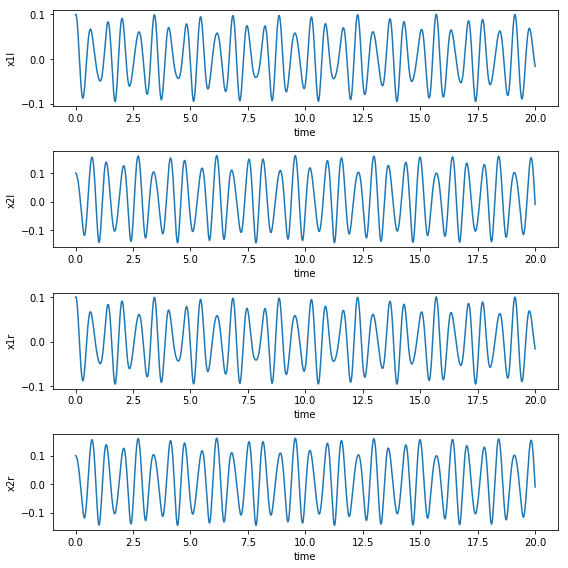

In [293]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot x1l as a function of time
ax1l = fig.add_subplot(411)
ax1l.plot(t, psoln[:,0])
ax1l.set_xlabel('time')
ax1l.set_ylabel('x1l')

# Plot x2l as a function of time
ax2l = fig.add_subplot(412)
ax2l.plot(t, psoln[:,2])
ax2l.set_xlabel('time')
ax2l.set_ylabel('x2l')

# Plot x1r as a function of time
ax1r = fig.add_subplot(413)
ax1r.plot(t, psoln[:,4])
ax1r.set_xlabel('time')
ax1r.set_ylabel('x1r')

# Plot x2r as a function of time
ax2r = fig.add_subplot(414)
ax2r.plot(t, psoln[:,6])
ax2r.set_xlabel('time')
ax2r.set_ylabel('x2r')

plt.tight_layout()
plt.show()

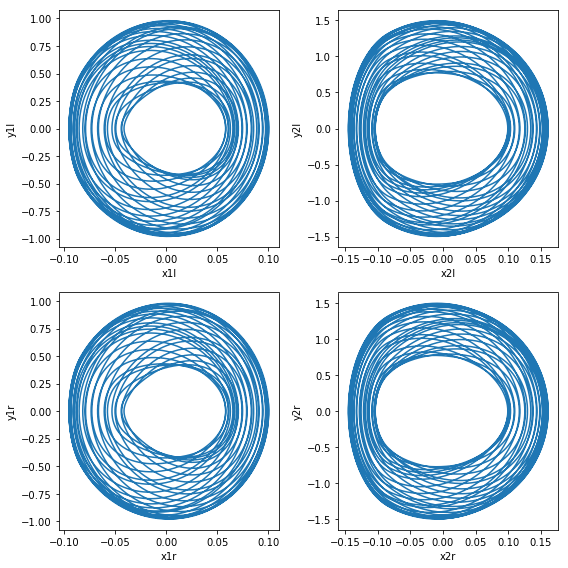

In [294]:
# Plot results
fig = plt.figure(1, figsize=(8,8))

# phase plot x1l
ax1l = fig.add_subplot(221)
ax1l.plot(psoln[:,0], psoln[:,1])
ax1l.set_xlabel('x1l')
ax1l.set_ylabel('y1l')

# phase plot x2l
ax2l = fig.add_subplot(222)
ax2l.plot(psoln[:,2], psoln[:,3])
ax2l.set_xlabel('x2l')
ax2l.set_ylabel('y2l')

# phase plot x1r
ax1r = fig.add_subplot(223)
ax1r.plot(psoln[:,4], psoln[:,5])
ax1r.set_xlabel('x1r')
ax1r.set_ylabel('y1r')

# phase plot x2r
ax2r = fig.add_subplot(224)
ax2r.plot(psoln[:,6], psoln[:,7])
ax2r.set_xlabel('x2r')
ax2r.set_ylabel('y2r')

plt.tight_layout()
plt.show()